# **Projet IA: Suivi de la réussite étudiante**

 

**<u>Objectif:</u>**  Déterminer les étudiants à risque d'échec afin de mieux les accompagner en vue de leur réussite académique; 

* Identifier les facteurs importants qui affectent les performances académiques de l'étudiant 
* Prédiction de la note à l'examen finale de l'étudiant 
* Classifier les étudiants en catégories potentielles "Réussite" ou "Échec" 

**<u>Description des caractéristiques:</u>**
* **Student_ID :** Identifiant unique pour chaque étudiant. 

* **Gender :** Sexe de l'étudiant (Homme/Femme). 
* **Study_Hours_per_Week :** Nombre moyen d'heures d'étude par semaine. 
* **Attendance_Rate :** Pourcentage d'assiduité (50% - 100%). 
* **Past_Exam_Scores :** Note moyenne des examens précédents (50 - 100). 
* **Parental_Education_Level :** Niveau d'éducation des parents (Lycée, Licence, Master, Doctorat). 
* **Internet_Access_at_Home :** Indique si l'étudiant a un accès à Internet à la maison (Oui/Non). 
* **Extracurricular_Activities :** Indique si l'étudiant participe à des activités parascolaires (Oui/Non). 
* **Final_Exam_Score (Target) :** La note à l'examen final de l'étudiant (50 - 100, valeurs entières). 
* **Pass_Fail (Target) :** Le statut de l'étudiant (Réussite/Échec). 

## **Analyse Exploratoire des Données (EDA)**

**Compréhension des données**
   * Aperću général (dimension du dataset, types de variables, résumé statistiques et autres)
   * Analyse univariée (Étudier les variables une par une)
   * Analyse bivariée (Explorer les relations entre les variables)
   * Détection d'anomalies (Identifier les outliers, valeurs extrêmes ou abérantes)
   * Valeurs manquantes (Réperer les colonnes ou lignes incomplètes)
   * Distribution du jeu de données (Comment les données sont réparties)

In [2]:
# Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random
import os
from sklearn import set_config

# Définir la graine aléatoire
# Reproducibilité
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# Définir `random_state=SEED` comme paramètre pour
# S'assurer de la reproducibilité

### (a) **Aperću général**

In [10]:
# Charger le jeu de données
students_df = pd.read_csv("../data/raw/student_performance_dataset.csv")
students_df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [2]:
# La colonne 'Student_ID' est superflue, non importante
students_df = students_df.drop(columns=['Student_ID'])
students_df.head()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,Male,16,78.222927,73,PhD,No,No,50,Fail
2,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [3]:
# Informations du jeu de données
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      708 non-null    object 
 1   Study_Hours_per_Week        708 non-null    int64  
 2   Attendance_Rate             708 non-null    float64
 3   Past_Exam_Scores            708 non-null    int64  
 4   Parental_Education_Level    708 non-null    object 
 5   Internet_Access_at_Home     708 non-null    object 
 6   Extracurricular_Activities  708 non-null    object 
 7   Final_Exam_Score            708 non-null    int64  
 8   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 49.9+ KB


In [4]:
students_df.shape # La taille de notre df

(708, 9)

In [5]:
# Résumé statistique des données numériques
students_df.describe()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


In [50]:
# Identifions les colonnes catégorielles des numériques
numerical_col = students_df.select_dtypes(include=['int64', 'float64']).columns.to_list()
categorical_col = [col for col in students_df.columns if students_df[col].dtype == 'object']
students_df_col = numerical_col + categorical_col # La fusion des 02.
students_df_col

['Study_Hours_per_Week',
 'Attendance_Rate',
 'Past_Exam_Scores',
 'Final_Exam_Score',
 'Student_ID',
 'Gender',
 'Parental_Education_Level',
 'Internet_Access_at_Home',
 'Extracurricular_Activities',
 'Pass_Fail']

In [7]:
# Déterminons les valeurs manquantes
students_df.isna().sum()

Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64

In [8]:
# Déterminons s'il existe des données dupliquées
students_df.duplicated().sum()

np.int64(208)

In [11]:
# Examinons de plus près les données dupliquées
students_df[students_df.duplicated()] # Retourne toutes les données qui dupliquées

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
20,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
42,S097,Female,29,68.864298,92,High School,No,No,64,Pass
49,S207,Female,20,89.075724,92,Bachelors,Yes,Yes,62,Pass
64,S380,Male,39,81.662039,97,Bachelors,Yes,Yes,66,Pass
90,S368,Female,15,77.836079,95,Masters,No,Yes,61,Pass
...,...,...,...,...,...,...,...,...,...,...
692,S307,Female,21,96.148012,84,Bachelors,Yes,No,65,Pass
695,S198,Female,33,87.298726,73,Masters,No,Yes,72,Pass
697,S183,Female,35,68.461524,99,PhD,Yes,No,67,Pass
704,S301,Male,35,60.278990,83,Masters,No,No,62,Pass


Tout à fait compréhensible, ces données se retrouvent dupliquées car plusieurs étudiants pourraient avoir les mêmes comportements au niveau scolaire, nombre d'heures de révisions par semaines, mêmes notes etc.

In [12]:
# Déterminons la proportion des données de la cible pour la classification
students_df['Pass_Fail'].value_counts().reset_index()

,Pass_Fail,count
0,Pass,354
1,Fail,354


In [14]:
# Déterminons la proportion/repartition des genres
students_df['Gender'].value_counts().reset_index()

,Gender,count
0,Female,375
1,Male,333


### (b) **Visualisation**

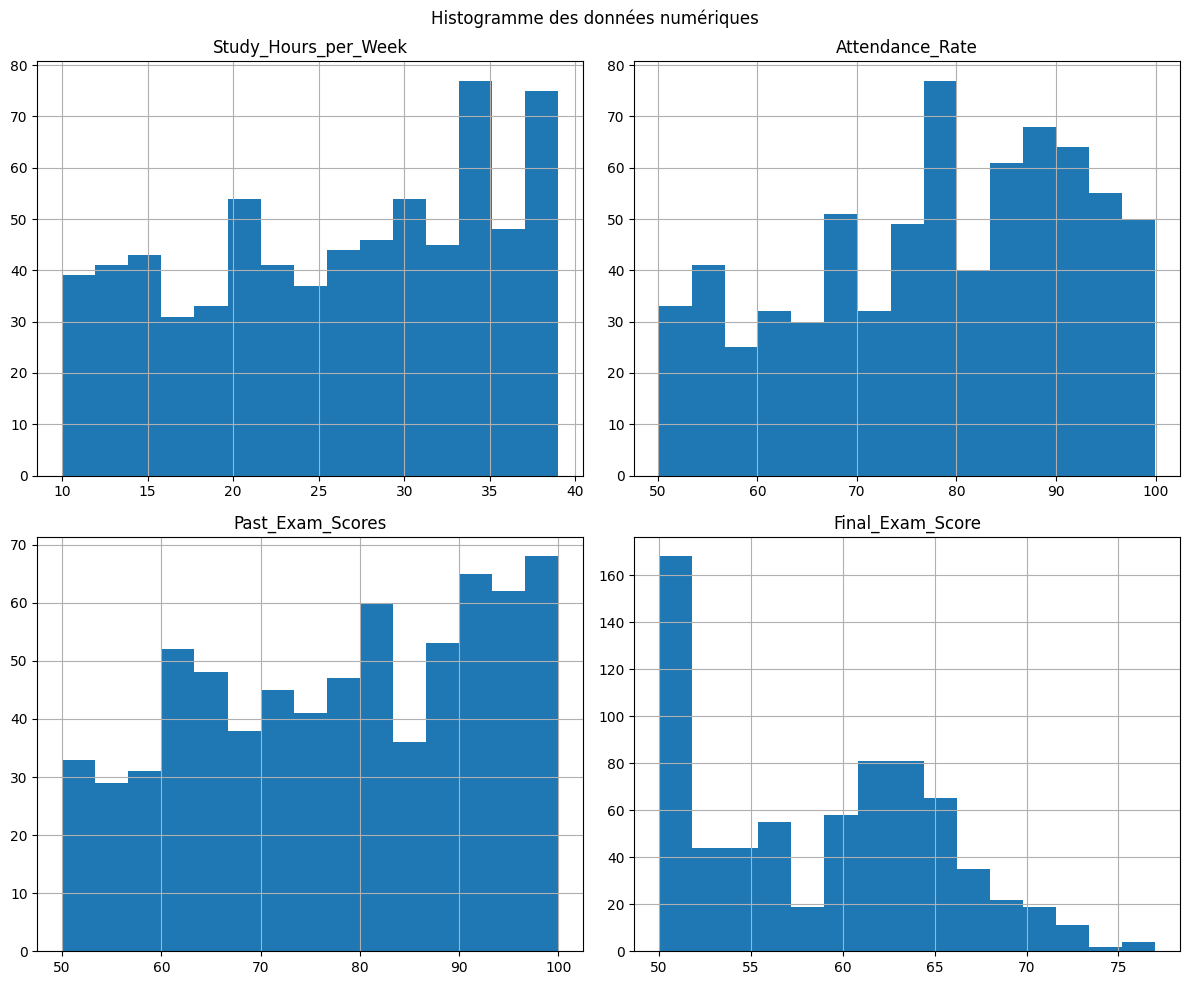

In [31]:
# Histogrammes avec DataFrame.hist(), pour colonnes numériques
students_df.hist(figsize=(12, 10), bins=15)
plt.suptitle("Histogramme des données numériques")
plt.tight_layout()
plt.show()

**Observations**:
- Le graphique indique la distribution globale de nos données numériques (Nombre d'heures d'études par semaines, présence en cours, résulats aux examens passés et résultats aux examens finaux).
- On constate que la plupart des étudiants ont eu plus de 50% comme score à leurs examens passés et finaux, malgré que plus de la moitié des étudiants etudie moins de 30h/semaine avec des faibles taux de présence aux cours.

In [24]:
# Répartition/proportion des données catégoriques
categorical_data_proportion = students_df[categorical_col].value_counts().unstack()
categorical_data_proportion

Pass_Fail                                                                           Fail  \
Gender Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities         
Female Bachelors                No                      No                            13   
                                                        Yes                           12   
                                Yes                     No                            11   
                                                        Yes                            7   
       High School              No                      No                            11   
                                                        Yes                            6   
                                Yes                     No                            14   
                                                        Yes                           13   
       Masters                  No                      No                             8   
                                                        Yes                            8   
                                Yes                     No                            15   
                                                        Yes                           14   
       PhD                      No                      No                            20   
                                                        Yes                            8   
                                Yes                     No                            10   
                                                        Yes                            6   
Male   Bachelors                No                      No                            16   
                                                        Yes                           14   
                                Yes                     No                             9   
                                                        Yes                           10   
       High School              No                      No                            13   
                                                        Yes                           14   
                                Yes                     No                            15   
                                                        Yes                           11   
       Masters                  No                      No                            12   
                                                        Yes                            2   
                                Yes                     No                             6   
                                                        Yes                           11   
       PhD                      No                      No                            14   
                                                        Yes                           10   
                                Yes                     No                            12   
                                                        Yes                            9   

Pass_Fail                                                                           Pass  
Gender Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities        
Female Bachelors                No                      No                            21  
                                                        Yes                           22  
                                Yes                     No                             5  
                                                        Yes                           14  
       High School              No                      No                            16  
                                                        Yes                           10  
                                Yes                     No                            12  
                                                    

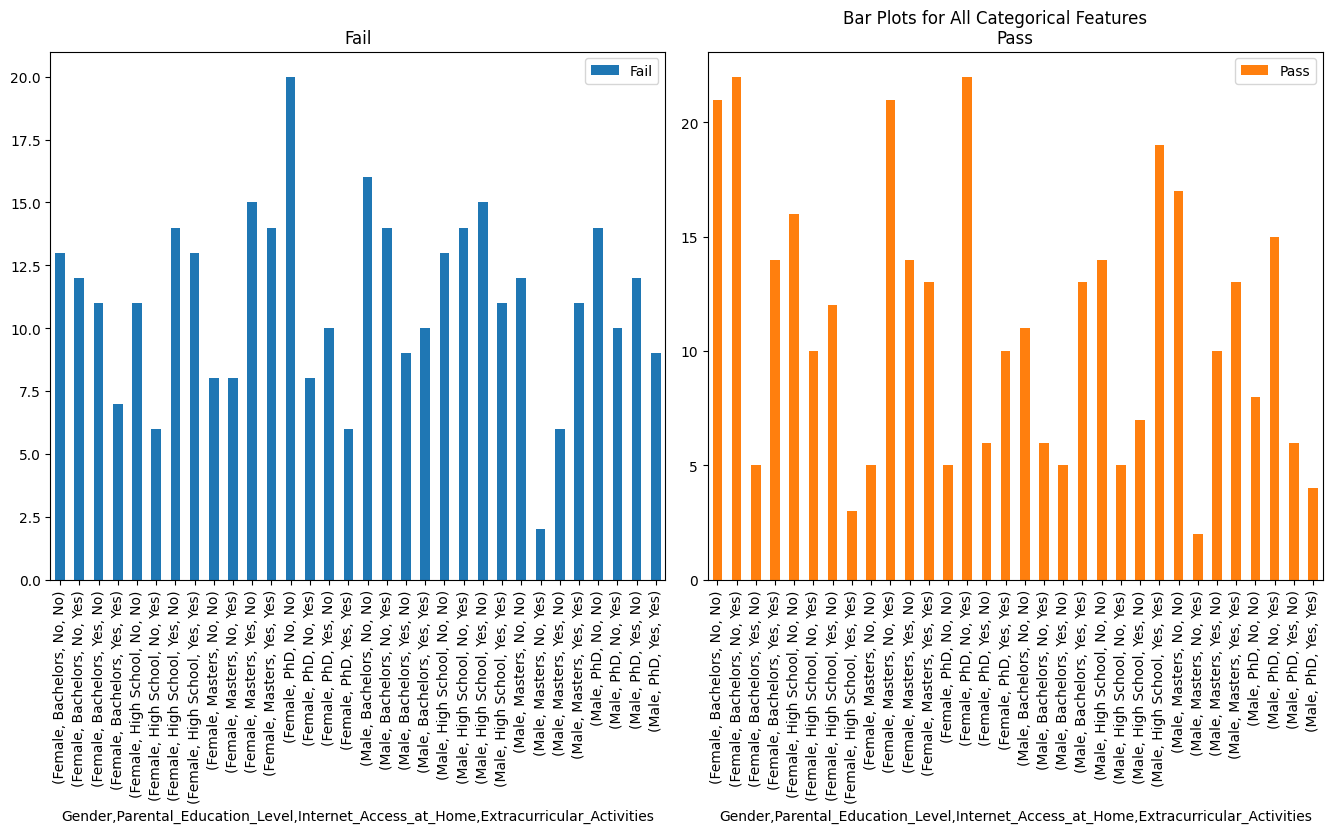

In [27]:
# Graphique en barres des données catégoriques.
categorical_data_proportion.plot(kind='bar', subplots=True, figsize=(20, 14), layout=(2, 3), legend=True)
plt.suptitle('Bar Plots for All Categorical Features')
plt.tight_layout()
plt.show()

**Observations**: 
- Nous avons sur les abscisses le tuple (genre, niveau d'éducation du parent, accès à l'internet, activités extra-scolaires) et de quelle faćon ća affecte la réussite académique de l'étudiant.
- En se concentrant sur quelques peak des `Fail`, on constate qu'il existe la possibilité que le niveau d'éducation parentale ne contribue pas grandement à l'echec de l'étudiant tant qu'il y'a un accès à internet à la maison et/ou l'étudiant n'est pas impliqué à une activité extra-scolaire.
- Pour certains peak des `Pass`, on constate également qu'il y'a une possibilité que le fait que l'étudiant soit impliqué à des activités extra-scolaire n'empêche pas son succès. Soit l'étudiant est naturellement brillant, soit beneficie de l'effort parental et de l'accès à internet à la maison.

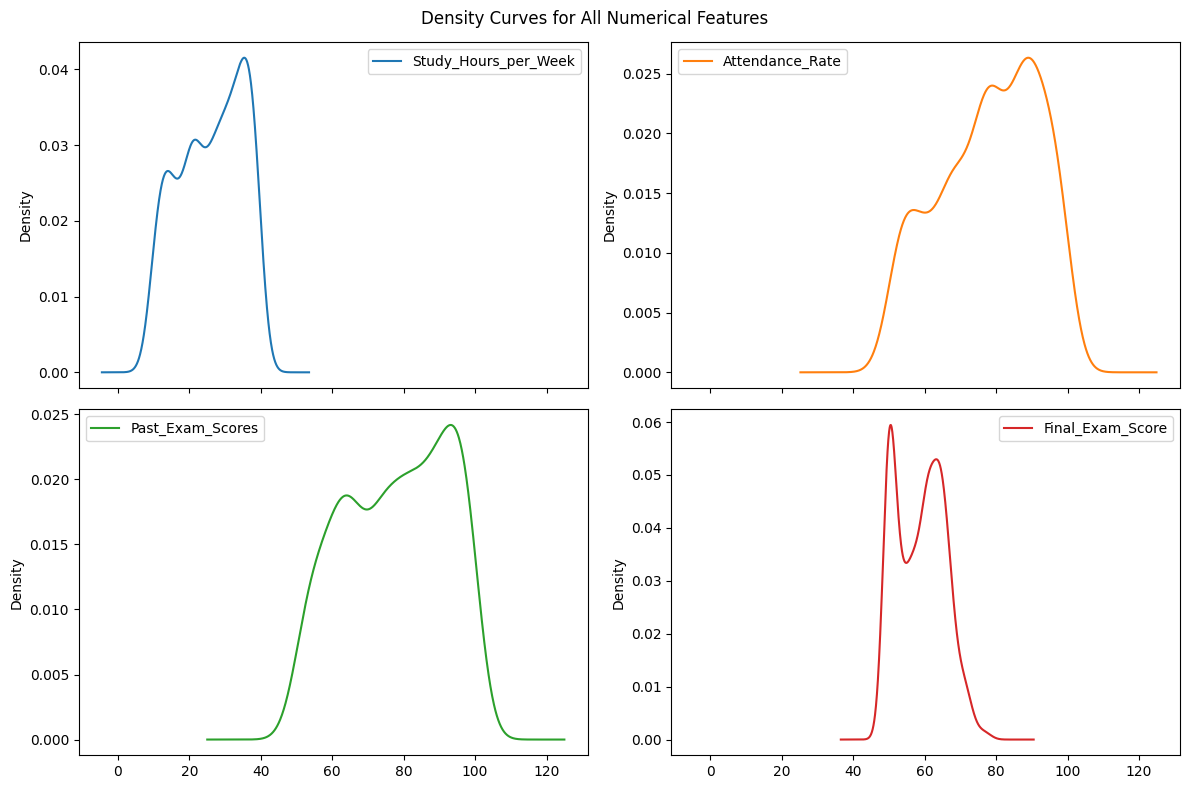

In [33]:
# Affichons la courbe densité (Kernel density estimates) de nos données numériques
students_df[numerical_col].plot(kind='density', subplots=True, figsize=(12, 8), layout=(2, 2))
plt.suptitle('Density Curves for All Numerical Features')
plt.tight_layout()
plt.show()

**Observations**:
- Ce graphique de densité résume notre histogramme plus haut.
- On peut estimer brièvement que 50% à 75% de nos données se situent dans les zones de fortes densité.

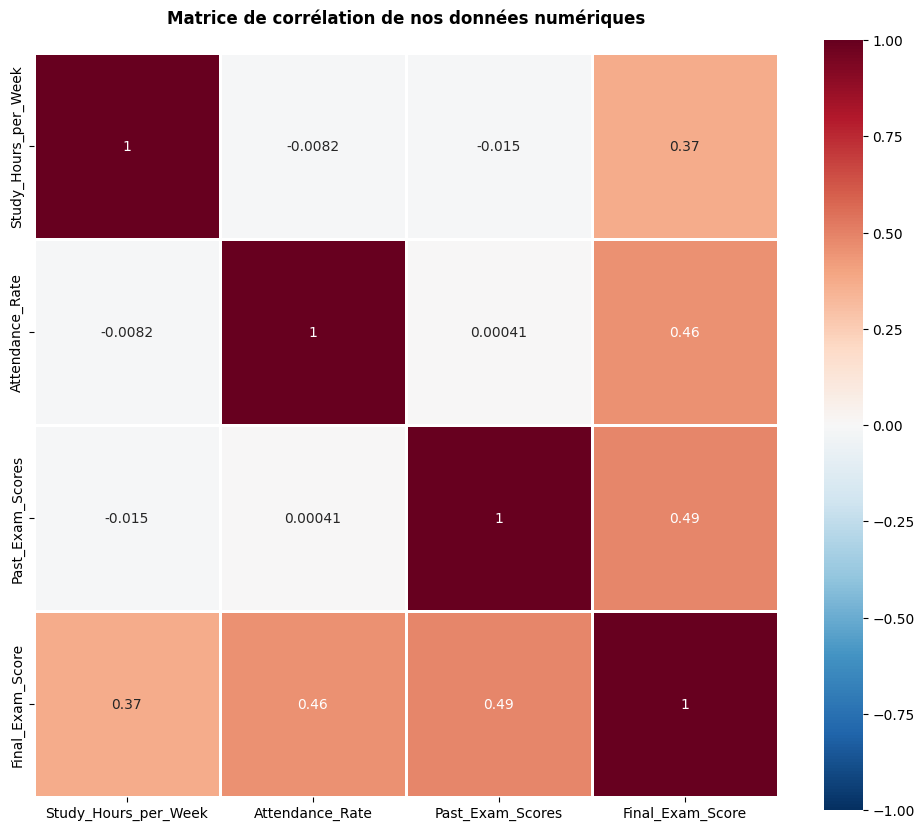

In [40]:
# Examinons la corrélation qui existent entre nos données numériques
correlation_matrix = students_df[numerical_col].corr()
plt.figure(figsize=(12, 10))
plt.title("Matrice de corrélation de nos données numériques\n", fontweight='bold')

_ = sns.heatmap(
  data=correlation_matrix, # Matrice de corréaltion
  robust=True, # Calcule les intervalles nécessaires en fonction des quantiles
  square=True, # Rend les représentations carrées,
  annot=True, # Fournit un graphique annoté
  linewidths=True, # Ajoute de la séparation entre les cellules,
  cmap='RdBu_r', # Red-Blue colormap, reversed,
  vmin=-1, # Minimum
  vmax=1, # Maximum,
)

plt.show()


**Observations:**
- Il existe des corrélations pertinentes entre les caractéristiques `Study_Hour_per_Week`, `Attendance_Rate`, `Past_Exam_Scores` et la cible `Final_Exam_score`. Ces variables contribuent visiblement au succès ou à l'echec d'un étudiant
- Tandis qu'il n'y a pas de corrélation visible direct entre `Attendance_Rate` et `Study_Hour_per_Week`. Ce qui suggère que soit l'étudiant est peu présent en cours mais possède un nombre d'heures d'études élévé, soit c'est l'inverse (L'étudiant est très présent en cours mais possède un nombre d'heures d'études faible)

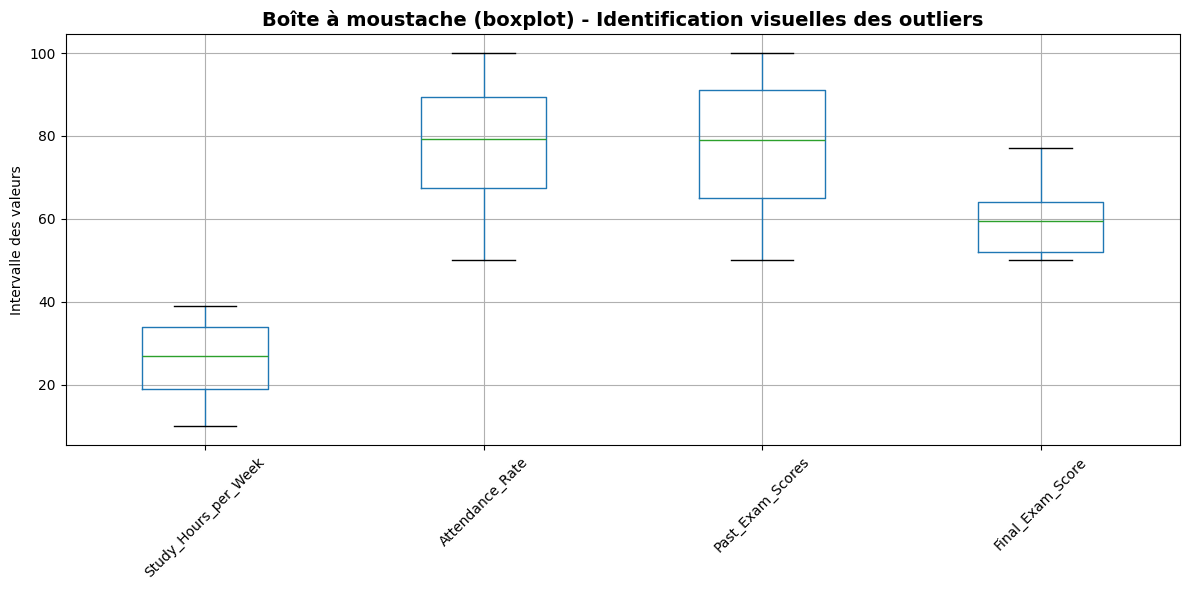

In [42]:
# Examinons les outliers/valeurs abérantes
# Boite à moustaches (Box & whiskers plot)
plt.figure(figsize=(12, 6))
students_df[numerical_col].boxplot() # Uniquement sur les colonnes numériques
plt.title('Boîte à moustache (boxplot) - Identification visuelles des outliers',fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Intervalle des valeurs')
plt.tight_layout()
plt.show()

**Observations:**
- Les données sont assez bien réparties, il n'y a pas d'outliers visibles apparents.
- Ce graphique confirme bel et bien l'hypothèse selon la plupart des données se situent dans l'IQR. 75% des données se retrouvent dans la boîte. La ligne au centre représente la médiane.

<Figure size 220x140 with 0 Axes>

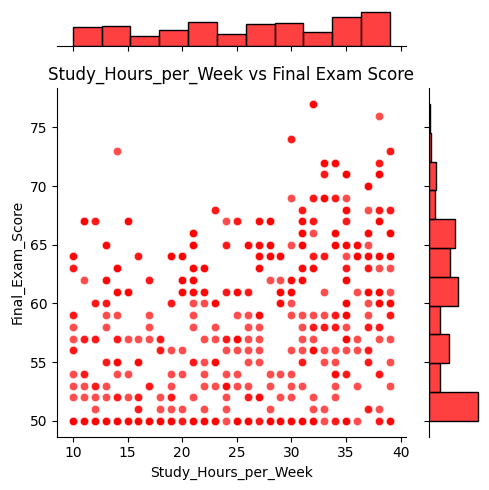

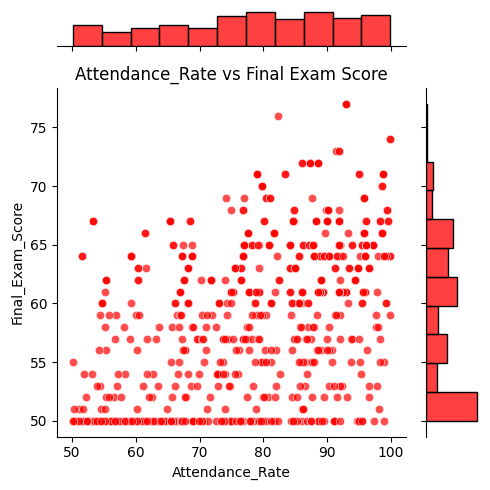

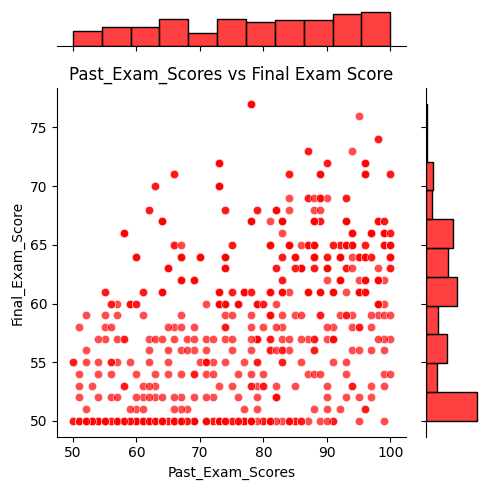

In [65]:
# Examinons comment de plus près les relations entre les données numériques et la cible
feature_col = numerical_col[:-1] # Cible numérique exempté
plt.figure(figsize=(2.2, 1.4))
for col in feature_col:
    sns.jointplot(data=students_df, x=col, y='Final_Exam_Score', 
                kind='scatter', alpha=0.7, height=5,
                color='red')
    plt.title(f'{col} vs Final Exam Score')
    plt.tight_layout()
    plt.show()

**Observations:**
- Ici nous avons un graphique de distribution jointe entre chaque variable numérique est la cible `Final_Exam_Score`.
- Le premier graphique nous montre que la plupart des étudiants ayant un `Final_Exam_Score` supérieur à 70% étudie au moins 20h/semaine
- Le deuxième graphique nous indique que le `Final_Exam_Score` des étudiants croît linéairement à partir de 65% et en fonction de leur taux d'assiduité/présence aux cours.
- Le troisième graphique nous démontre de faćon visuelle la corrélation qui existe entre le `Past_Exam_Scores` et le `Final_Exam_Score`. Sur le graphique, dans l'intervalle [50, 60] l'axe des `Past_Exam_Scores`, on réalise que l'ensemble des points sur cet intervalle est _mappée_ sur `Final_Exam_Score` dans l'intervalle [50, 70[. Ce qui signifie qu'il y'a une augmentation générale, par rapport à leurs notes passées. Et dans l'intervalle [80, 100] aux examens passées `Past_Exam_Scores`, est mappée sur `Final_Exam_Score` l'intervale [50, 80[ nous précisant qu'il y'a des étudiants qui ont regressé. C'est-à-dire, décroitre d'une note de 80%+ vers 50%+


In [74]:
# Vérifions le dernier point
# Affichons l'ensemble des étudiants ayant 80%+ aux `Past_Exam_Scores` mais 50%+ au `Final_Exam_Score`
students_df[
  (students_df['Past_Exam_Scores']>=80) & (students_df['Final_Exam_Score']>=50)
  ][['Past_Exam_Scores', 'Final_Exam_Score']]

,Past_Exam_Scores,Final_Exam_Score
0,86,63
3,99,65
6,95,61
8,94,65
9,86,55
...,...,...
697,99,67
701,90,50
704,83,62
706,84,65


**NB: CQFD**

## **Préparation des données et Modélisation**

**Plan de préparation des données:**
* Suppression des doublons - Les doublons dans ce contexte pourrait être pertinent car un ou plusieurs étudiants peuvent avoir des mêmes habitudes d'études et ainsi aboutir à la même note et au même résultat final, seulement pour éviter des comportements inhabituels sur nos modèles, nous les supprimons.
* Encodage des variables catégorielles
* Encodage des variables numériques

Traitement des lignes répétées : 

In [14]:
# Suppression des doublons pour optimiser le dataset en phase de préprocessing machine learning
#
students_df = students_df.drop_duplicates()

print("Nombre de lignes après suppression des doublons :", students_df.shape[0])

# on a deja detecte (208 doublons). Il faut les enlever pour que le modele n’apprenne pas plusieurs fois la meme information.


Nombre de lignes après suppression des doublons : 500


Encodage des variables catégorielles (One-Hot Encoding)

In [15]:
# Encodage One-Hot
cat_cols = ["Gender", "Parental_Education_Level", 
            "Internet_Access_at_Home", "Extracurricular_Activities"]

students_df = pd.get_dummies(students_df, columns=cat_cols, drop_first=True)

print("Colonnes après encodage :", students_df.columns)



Colonnes après encodage : Index(['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores',
       'Final_Exam_Score', 'Pass_Fail', 'Gender_Male',
       'Parental_Education_Level_High School',
       'Parental_Education_Level_Masters', 'Parental_Education_Level_PhD',
       'Internet_Access_at_Home_Yes', 'Extracurricular_Activities_Yes'],
      dtype='object')


Standardiser les variables numerique :

In [16]:

from sklearn.preprocessing import StandardScaler

# Colonnes numeriques a standardiser
num_cols = ["Study_Hours_per_Week", "Attendance_Rate", "Past_Exam_Scores"]

# Initialisation du scaler
scaler = StandardScaler()

# Application de la standardisation directement sur le DataFrame encode
students_df[num_cols] = scaler.fit_transform(students_df[num_cols])

print("Vérification des données après standardisation :")
print(students_df[num_cols].head())



Vérification des données après standardisation :
   Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores
0              0.661242        -0.541937          0.747277
1             -1.044161         0.171423         -0.153725
2             -0.475694         0.837996         -0.084417
3              0.206467         1.164138          1.648278
4              1.343403         1.635578         -0.846803


Preparation des donnees X_train, Y_train : 

In [ ]:


# convertir Pass/Fail en 1/0 pour les metriques
students_df["Pass_Fail"] = students_df["Pass_Fail"].replace({"Pass": 1, "Fail": 0})


from sklearn.model_selection import train_test_split

# entrees = tout sauf les deux cibles
entrees = students_df.drop(["Pass_Fail","Final_Exam_Score"], axis=1)
cibleclass = students_df["Pass_Fail"]
ciblescore = students_df["Final_Exam_Score"]

trainx, testx, trainyclass, testyclass = train_test_split(
    entrees, cibleclass, test_size=0.2, random_state=1, stratify=cibleclass
)

# on garde les memes index pour la regression
trainyscore = ciblescore.loc[trainyclass.index]
testyscore  = ciblescore.loc[testyclass.index]


2. Modelisation :


On teste 2 approches simples: Regression Logistique et Arbre de Decision :

In [ ]:


from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

logistique = LogisticRegression(max_iter=500)
logistique.fit(trainx, trainyclass)

arbre = DecisionTreeClassifier(random_state=1)
arbre.fit(trainx, trainyclass)

lineaire = LinearRegression()
lineaire.fit(trainx, trainyscore)

arbreg = DecisionTreeRegressor(random_state=1)
arbreg.fit(trainx, trainyscore)

print("modeles entraines: logistique, arbre, lineaire, arbreg")

modeles entraines: logistique, arbre, lineaire, arbreg


3. Evaluation classification : 

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

 
predlog = logistique.predict(testx)
predarb = arbre.predict(testx)

acc_log = accuracy_score(testyclass, predlog)
pre_log = precision_score(testyclass, predlog, zero_division=0)
rap_log = recall_score(testyclass, predlog, zero_division=0)
f1_log  = f1_score(testyclass, predlog, zero_division=0)

acc_arb = accuracy_score(testyclass, predarb)
pre_arb = precision_score(testyclass, predarb, zero_division=0)
rap_arb = recall_score(testyclass, predarb, zero_division=0)
f1_arb  = f1_score(testyclass, predarb, zero_division=0)

print("regression logistique ")
print("accuracy:", round(acc_log,3), " precision:", round(pre_log,3), " rappel:", round(rap_log,3), " f1:", round(f1_log,3))
print("matrice de confusion:\n", confusion_matrix(testyclass, predlog))

print("\n arbre de decision ")
print("accuracy:", round(acc_arb,3), " precision:", round(pre_arb,3), " rappel:", round(rap_arb,3), " f1:", round(f1_arb,3))
print("matrice de confusion:\n", confusion_matrix(testyclass, predarb))

meilleurclass = "logistique" if f1_log >= f1_arb else "arbre"
meilleurf1 = f1_log if f1_log >= f1_arb else f1_arb
print("\nresume classif : meilleur modele (f1):", meilleurclass, " f1:", round(meilleurf1,3))

regression logistique 
accuracy: 0.88  precision: 0.947  rappel: 0.621  f1: 0.75
matrice de confusion:
 [[70  1]
 [11 18]]

 arbre de decision 
accuracy: 0.83  precision: 0.773  rappel: 0.586  f1: 0.667
matrice de confusion:
 [[66  5]
 [12 17]]

resume classif : meilleur modele (f1): logistique  f1: 0.75


4. Evaluation Regression :

ON compare les deux modeles : regression lineaire et arbre de regression.

On affiche directement les trois mesures principales :

MAE (erreur moyenne absolue)

RMSE (erreur moyenne quadratique)

R² (qualite du modele)

On donne notre observation

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

prediction_lineaire = lineaire.predict(testx)
print("Premieres predictions du modele lineaire :", prediction_lineaire[:10])

prediction_arbre = arbreg.predict(testx)
print("Premieres predictions du modele arbre :", prediction_arbre[:10])


print("Calcul des erreurs pour le modele lineaire")
mae_lineaire = mean_absolute_error(testyscore, prediction_lineaire)
print("MAE lineaire :", round(mae_lineaire,2))

rmse_lineaire = np.sqrt(mean_squared_error(testyscore, prediction_lineaire))
print("RMSE lineaire :", round(rmse_lineaire,2))

r2_lineaire = r2_score(testyscore, prediction_lineaire)
print("R2 lineaire :", round(r2_lineaire,3))

print("Calcul des erreurs pour le modele arbre")
mae_arbre = mean_absolute_error(testyscore, prediction_arbre)
print("MAE arbre :", round(mae_arbre,2))

rmse_arbre = np.sqrt(mean_squared_error(testyscore, prediction_arbre))
print("RMSE arbre :", round(rmse_arbre,2))

r2_arbre = r2_score(testyscore, prediction_arbre)
print("R2 arbre :", round(r2_arbre,3))

print("Observation :")
print("Le modele lineaire donne R2", round(r2_lineaire,3))
print("Le modele arbre donne R2", round(r2_arbre,3))
print("Le meilleur modele est celui avec le R2 le plus eleve et la plus petite erreur MAE.")


Premieres predictions du modele lineaire : [56.49609246 65.76599943 60.35382584 57.12087599 62.31615156 54.42652857
 57.20223027 56.5811168  56.5856162  58.08870494]
Premieres predictions du modele arbre : [57. 71. 60. 51. 67. 50. 59. 59. 56. 67.]
Calcul des erreurs pour le modele lineaire
MAE lineaire : 3.28
RMSE lineaire : 3.92
R2 lineaire : 0.618
Calcul des erreurs pour le modele arbre
MAE arbre : 3.59
RMSE arbre : 5.01
R2 arbre : 0.376
Observation :
Le modele lineaire donne R2 0.618
Le modele arbre donne R2 0.376
Le meilleur modele est celui avec le R2 le plus eleve et la plus petite erreur MAE.


5. Tableau de recap : 

In [ ]:
tableau_resultat = pd.DataFrame({
    "Modele": ["Regression logistique", "Arbre de decision", "Regression lineaire", "Arbre de regression"],
    "Exactitude (accuracy)": [acc_log, acc_arb, None, None],
    "Precision": [pre_log, pre_arb, None, None],
    "Rappel": [rap_log, rap_arb, None, None],
    "F1-score": [f1_log, f1_arb, None, None],
    "Erreur MAE": [None, None, mae_lineaire, mae_arbre],
    "Erreur RMSE": [None, None, rmse_lineaire, rmse_arbre],
    "Score R2": [None, None, r2_lineaire, r2_arbre]
})

print(" Tableau recapitulatif des performances ")
print(tableau_resultat)

 Tableau recapitulatif des performances 
                  Modele  Exactitude (accuracy)  Precision    Rappel  \
0  Regression logistique                   0.88   0.947368  0.620690   
1      Arbre de decision                   0.83   0.772727  0.586207   
2    Regression lineaire                    NaN        NaN       NaN   
3    Arbre de regression                    NaN        NaN       NaN   

   F1-score  Erreur MAE  Erreur RMSE  Score R2  
0  0.750000         NaN          NaN       NaN  
1  0.666667         NaN          NaN       NaN  
2       NaN    3.279339     3.919492  0.617850  
3       NaN    3.590000     5.008992  0.375871  
